In [7]:
from tools.entry_anomaly_detector import EntryASMonitor

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# path = 'measurement_data/single-probe-anchor-traceroute_1.json'
path = 'measurement_data/traceroute-34761880.json'

entry_as_monitor = EntryASMonitor()
df = entry_as_monitor.read_dataset(path)
df

,probe_id,created,entry_rtt,entry_ip,entry_as
0,1000067,2022-01-10 00:07:08+00:00,184.710,103.87.184.123,136106
1,10003,2022-01-10 00:07:02+00:00,185.559,114.5.178.138,4761
2,1000440,2022-01-10 00:07:05+00:00,195.732,103.87.184.123,136106
3,1000647,2022-01-10 00:07:12+00:00,201.101,114.5.178.138,4761
4,1000779,2022-01-10 00:07:10+00:00,209.106,114.5.178.138,4761
...,...,...,...,...,...
55613,55683,2022-01-11 11:37:06+00:00,195.339,114.5.178.138,4761
55614,55775,2022-01-11 11:37:08+00:00,197.098,103.87.184.123,136106
55615,599,2022-01-11 11:37:01+00:00,177.265,103.87.184.123,136106
55616,684,2022-01-11 11:37:15+00:00,306.375,114.5.178.138,4761


Score in 4761: 59.24 at 2022-01-11 06:20:00+00:00
Anomaly at 11/01/2022, 06:20:00 in AS4761. Problem with 109 probes. Percentage of AS: 59.24
Score in 136106: 21.38 at 2022-01-11 06:20:00+00:00
Anomaly at 11/01/2022, 06:20:00 in AS136106. Problem with 31 probes. Percentage of AS: 21.38
Score in 1273: 20.0 at 2022-01-11 06:20:00+00:00
Anomaly at 11/01/2022, 06:20:00 in AS1273. Problem with 2 probes. Percentage of AS: 20.0
Score in 132602: 117.39 at 2022-01-11 06:20:00+00:00
Anomaly at 11/01/2022, 06:20:00 in AS132602. Problem with 27 probes. Percentage of AS: 117.39
Score in 17922: 54.55 at 2022-01-11 06:20:00+00:00
Anomaly at 11/01/2022, 06:20:00 in AS17922. Problem with 6 probes. Percentage of AS: 54.55
Score in 6453: 0.0 at 2022-01-11 06:20:00+00:00


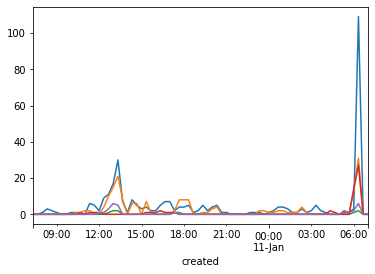

In [8]:
# time = '6:55'
time = '7:20'
df_timebox = df[(df['created'] > f'2022-01-10 {time}') & (df['created'] < f'2022-01-11 {time}')]

df_outlier = entry_as_monitor.analyze(df_timebox)
anomalies, aggregated = entry_as_monitor.filter(df_outlier)

In [116]:
aggregated[0]

created
2022-01-10 07:20:00+00:00      0
2022-01-10 07:40:00+00:00      0
2022-01-10 08:00:00+00:00      1
2022-01-10 08:20:00+00:00      3
2022-01-10 08:40:00+00:00      2
                            ... 
2022-01-11 05:40:00+00:00      1
2022-01-11 06:00:00+00:00      3
2022-01-11 06:20:00+00:00    109
2022-01-11 06:40:00+00:00      0
2022-01-11 07:00:00+00:00      0
Freq: 20T, Name: level_shift, Length: 72, dtype: object

In [9]:
anomalies

[{'time': Timestamp('2022-01-11 06:20:00+0000', tz='UTC', freq='20T'),
  'ip-adresses': ['114.5.178.138'],
  'as-number': '4761',
  'detection-methon': 'entry_connection',
  'anomaly-score': 59.24,
  'probes-through-as': 184,
  'mean-value-change': 2.3382798913043494},
 {'time': Timestamp('2022-01-11 06:20:00+0000', tz='UTC', freq='20T'),
  'ip-adresses': ['103.87.184.123'],
  'as-number': '136106',
  'detection-methon': 'entry_connection',
  'anomaly-score': 21.38,
  'probes-through-as': 145,
  'mean-value-change': -0.1406489361702121},
 {'time': Timestamp('2022-01-11 06:20:00+0000', tz='UTC', freq='20T'),
  'ip-adresses': ['103.225.173.63',
   '10.200.17.22',
   '192.168.0.1',
   '192.168.4.1'],
  'as-number': '1273',
  'detection-methon': 'entry_connection',
  'anomaly-score': 20.0,
  'probes-through-as': 10,
  'mean-value-change': 1.1655000000000006},
 {'time': Timestamp('2022-01-11 06:20:00+0000', tz='UTC', freq='20T'),
  'ip-adresses': ['27.111.229.143'],
  'as-number': '132602',

In [41]:
from datetime import  datetime, timedelta

qdate = datetime.now() - timedelta(days=1)
print(qdate)

2022-01-28 18:12:29.276966
